In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.tree import DecisionTreeRegressor, plot_tree, _tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display, HTML, Image as IPImage
import warnings
warnings.filterwarnings('ignore')

# 设置全局matplotlib字体 - Times New Roman + 加粗加大50%
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12
rcParams['axes.labelsize'] = 18  # 轴标签字体大小 (原12*1.5)
rcParams['axes.labelweight'] = 'bold'  # 轴标签加粗
rcParams['xtick.labelsize'] = 15  # x轴刻度标签字体大小 (原10*1.5)
rcParams['ytick.labelsize'] = 15  # y轴刻度标签字体大小 (原10*1.5)
rcParams['xtick.major.width'] = 2  # x轴刻度线宽度
rcParams['ytick.major.width'] = 2  # y轴刻度线宽度
rcParams['axes.linewidth'] = 1.5  # 坐标轴线宽度
rcParams['legend.fontsize'] = 12
rcParams['legend.frameon'] = True
rcParams['legend.fancybox'] = True
rcParams['figure.titlesize'] = 16
rcParams['figure.titleweight'] = 'bold'

class pKaPredictionTutorial:
    def __init__(self):
        self.dataset = None
        self.testset = None
        self.model = None
        self.features = []
        self.smiles_col = "SMILES"
        self.name_col = "Molecule Name"
        self.train_X = self.train_y = self.val_X = self.val_y = None
        self.val_idx = None
        self.selected_depth = 3
        
def display_knowledge_steps(self):
    """显示分步知识介绍"""
    knowledge_steps = [
        # 1. Acid-base and pKa basics
        """
        <div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin: 10px 0;">
        <h3 style="color: #2E8B57; font-family: Times New Roman;">1. Acid Dissociation Equilibrium and pKa</h3>
        <p style="font-family: Times New Roman; font-size: 14px;">
        The acidity of a compound can be described by its ability to release a proton (H⁺).<br>
        For a generic acid (HA), the dissociation equilibrium is: <strong>HA ⇌ H⁺ + A⁻</strong><br>
        The acid dissociation constant is: <strong>Kₐ = [H⁺][A⁻] / [HA]</strong><br>
        pKa is defined as the negative logarithm: <strong>pKₐ = -log₁₀(Kₐ)</strong><br>
        <em>A lower pKa means stronger acid (more dissociation), a higher pKa means weaker acid.</em>
        </p>
        </div>
        """,
        
        # 2. Measurement challenges
        """
        <div style="background-color: #fff8dc; padding: 20px; border-radius: 10px; margin: 10px 0;">
        <h3 style="color: #DAA520; font-family: Times New Roman;">2. How is pKa measured?</h3>
        <p style="font-family: Times New Roman; font-size: 14px;">
        For simple acids, pKa can be determined by titration, pH meters, or using acid-base indicators.<br>
        For complex organic acids, accurate measurement is often difficult due to low solubility, 
        instability, or overlapping equilibria. In such cases, we often turn to computational or 
        data-driven prediction methods like <strong>machine learning</strong>.
        </p>
        </div>
        """,
        
        # 3. Structure-activity relationship
        """
        <div style="background-color: #f5fffa; padding: 20px; border-radius: 10px; margin: 10px 0;">
        <h3 style="color: #2E8B57; font-family: Times New Roman;">3. What determines acidity and pKa?</h3>
        <p style="font-family: Times New Roman; font-size: 14px;">
        The acidity of a compound depends on its molecular structure:<br>
        • <strong>Electron-withdrawing groups</strong> increase acidity (lower pKa)<br>
        • <strong>Electron-donating groups</strong> decrease acidity (raise pKa)<br>
        • <strong>Aromatic rings, conjugation, and resonance</strong> can influence acidity<br>
        Chemists use these concepts to estimate or rationalize pKa, but quantitative prediction 
        is challenging for diverse structures.
        </p>
        </div>
        """,
        
        # 4. Machine learning basics
        """
        <div style="background-color: #ffefd5; padding: 20px; border-radius: 10px; margin: 10px 0;">
        <h3 style="color: #CD853F; font-family: Times New Roman;">4. What is Machine Learning?</h3>
        <p style="font-family: Times New Roman; font-size: 14px;">
        Machine learning is about building models that learn patterns from data, and can make 
        predictions for new, unseen data.<br>
        <strong>General workflow:</strong><br>
        1. Data collection & preprocessing<br>
        2. Define the task (e.g., regression or classification)<br>
        3. Choose a model (e.g., decision tree)<br>
        4. Train the model on existing data (training set)<br>
        5. Evaluate the model on new data (validation/test set)<br>
        6. Use the trained model to make predictions
        </p>
        </div>
        """
    ]
    
    for step in knowledge_steps:
        display(HTML(step))

# 将方法添加到类中
pKaPredictionTutorial.display_knowledge_steps = display_knowledge_steps        
tutorial = run_complete_tutorial()

🎓 pKa Prediction with Decision Trees - Interactive Tutorial

📚 Step 1: Knowledge Introduction


In [11]:
def load_dataset(self, file_path):
    """加载数据集"""
    print("📁 Loading dataset...")
    df = pd.read_csv(file_path)
    
    # 处理缺失值 - 与原著一致
    mask_missing = df.isnull().any(axis=1)
    if sum(mask_missing) > 0:
        self.testset = df.loc[mask_missing].reset_index(drop=True)
        self.dataset = df.loc[~mask_missing].reset_index(drop=True)
        print(f"✅ Dataset loaded: {len(self.dataset)} complete samples, {len(self.testset)} incomplete samples for testing")
    else:
        self.dataset = df
        self.testset = None
        print(f"✅ Dataset loaded: {len(self.dataset)} samples")
    
    # 提取特征列
    self.features = [col for col in df.columns if col not in [self.smiles_col, self.name_col, 'pKa']]
    print(f"🔬 Features identified: {len(self.features)} molecular descriptors")
    
    return self.dataset.head()

# 将方法添加到类中
pKaPredictionTutorial.load_dataset = load_dataset
data = tutorial.load_dataset('test_dataset1_1015.csv')


📁 Loading dataset...
✅ Dataset loaded: 18 complete samples, 2 incomplete samples for testing
🔬 Features identified: 5 molecular descriptors


AttributeError: 'pKaPredictionTutorial' object has no attribute 'visualize_dataset'

📊 Dataset Visualization
Dataset shape: (18, 8)
pKa range: 0.51 - 4.90


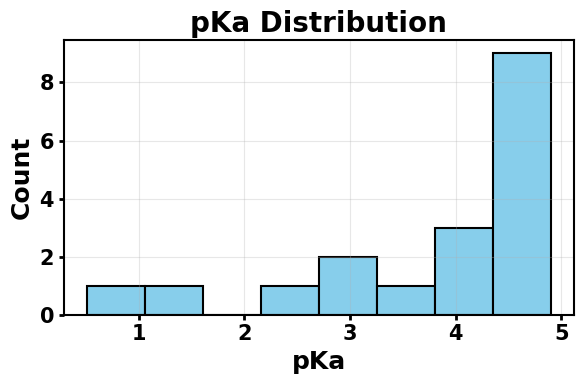

In [12]:
def visualize_dataset(self):
    """数据集可视化 - 仅显示pKa分布，与原著一致"""
    print("📊 Dataset Visualization")
    print("=" * 50)
    
    # 数据概览
    print(f"Dataset shape: {self.dataset.shape}")
    print(f"pKa range: {self.dataset['pKa'].min():.2f} - {self.dataset['pKa'].max():.2f}")
    
    # pKa分布图 - 与原著一致
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(self.dataset['pKa'].dropna(), bins=8, color="skyblue", edgecolor="black", linewidth=1.5)
    
    # 设置轴标签 - 增加50%字体大小并加粗
    ax.set_xlabel("pKa", fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_ylabel("Count", fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_title("pKa Distribution", fontsize=20, fontweight='bold', fontfamily='Times New Roman')
    
    # 设置刻度标签 - 增加50%字体大小并加粗
    ax.tick_params(axis='both', which='major', labelsize=15, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontfamily('Times New Roman')
        label.set_fontweight('bold')
    
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 将方法添加到类中
pKaPredictionTutorial.visualize_dataset = visualize_dataset
tutorial.visualize_dataset()

🤖 Training Decision Tree Model (Depth = 3)


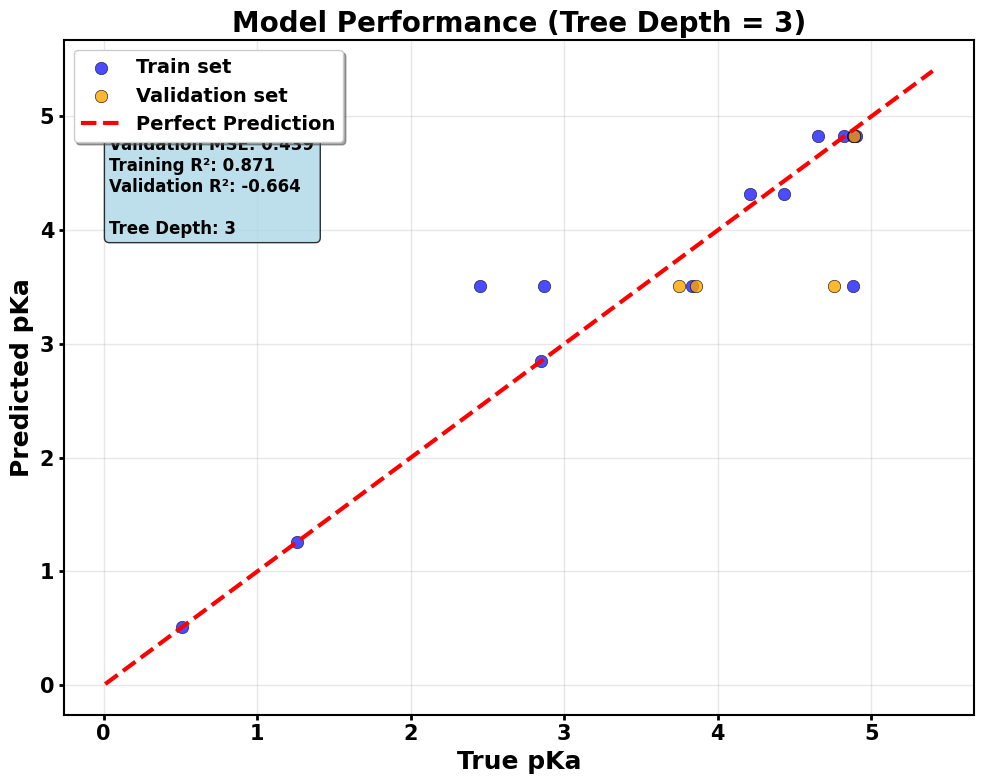


🧪 Validation Set Molecules with Predictions:

1. Formic acid
   SMILES: O=CO
   True pKa: 3.75
   Predicted pKa: 3.51
   Error: 0.24


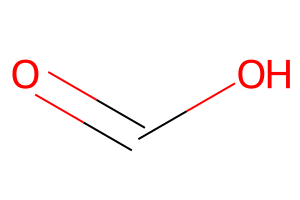


2. Acetic acid
   SMILES: CC(=O)O
   True pKa: 4.76
   Predicted pKa: 3.51
   Error: 1.25


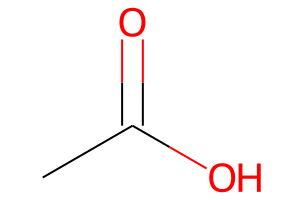


3. Heptanoic acid
   SMILES: CCCCCCCC(=O)O
   True pKa: 4.89
   Predicted pKa: 4.83
   Error: 0.06


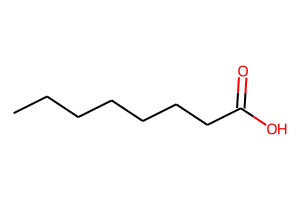


4. Octanoic acid
   SMILES: CCCCCCCCC(=O)O
   True pKa: 4.89
   Predicted pKa: 4.83
   Error: 0.06


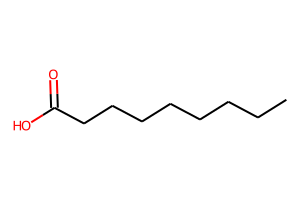


5. Lactic acid
   SMILES: CC(O)C(=O)O
   True pKa: 3.86
   Predicted pKa: 3.51
   Error: 0.35


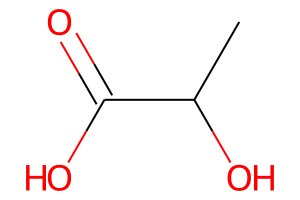


Model Training Complete (Depth = 3):
------------------------------------------------------------
Training MAE: 0.2844
Validation MAE: 0.4774
Training MSE: 0.2557
Validation MSE: 0.4389
Training R²: 0.8708
Validation R²: -0.6643
MAE Gap (Val-Train): 0.1929
MSE Gap (Val-Train): 0.1832
⚠️  Warning: Large gap between training and validation error suggests overfitting!


DecisionTreeRegressor(max_depth=3, random_state=1)

In [13]:
def train_model_with_depth(self, max_depth=3):
    """训练指定深度的模型 - 与原著一致"""
    self.selected_depth = max_depth
    
    print(f"🤖 Training Decision Tree Model (Depth = {max_depth})")
    print("=" * 50)
    
    # 数据准备 - 与原著完全一致
    df = self.dataset.dropna(subset=self.features + ['pKa'])
    X = df[self.features].values
    y = df['pKa'].values
    train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)
    self.train_X, self.train_y = train_X, train_y
    self.val_X, self.val_y = val_X, val_y

    # 记录验证集索引 - 与原著一致
    val_mask = np.isin(y, val_y)
    self.val_idx = df.index[val_mask]

    # 训练模型 - 与原著一致
    self.model = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
    self.model.fit(train_X, train_y)

    # 预测和评估 - 与原著一致
    pred_train = self.model.predict(train_X)
    pred_val = self.model.predict(val_X)

    train_mae = mean_absolute_error(train_y, pred_train)
    val_mae = mean_absolute_error(val_y, pred_val)
    train_mse = mean_squared_error(train_y, pred_train)
    val_mse = mean_squared_error(val_y, pred_val)
    train_r2 = r2_score(train_y, pred_train)
    val_r2 = r2_score(val_y, pred_val)

    # 绘制性能图表 - 与原著一致
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(train_y, pred_train, color='blue', alpha=0.7, label='Train set', s=80, edgecolors='black', linewidth=0.5)
    ax.scatter(val_y, pred_val, color='orange', alpha=0.8, label='Validation set', s=80, edgecolors='black', linewidth=0.5)
    minval = min(np.min(train_y), np.min(val_y), np.min(pred_train), np.min(pred_val)) - 0.5
    maxval = max(np.max(train_y), np.max(val_y), np.max(pred_train), np.max(pred_val)) + 0.5
    ax.plot([minval, maxval], [minval, maxval], 'r--', label='Perfect Prediction', linewidth=3)
    
    # 设置标签和标题 - 轴标签增加50%字体大小并加粗
    ax.set_xlabel('True pKa', fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_ylabel('Predicted pKa', fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_title(f'Model Performance (Tree Depth = {max_depth})', 
                fontsize=20, fontweight='bold', fontfamily='Times New Roman')
    
    # 设置刻度标签 - 增加50%字体大小并加粗
    ax.tick_params(axis='both', which='major', labelsize=15, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontfamily('Times New Roman')
        label.set_fontweight('bold')
    
    # 图例 - Times New Roman字体并加粗
    legend = ax.legend(fontsize=14, frameon=True, fancybox=True, shadow=True)
    for text in legend.get_texts():
        text.set_fontfamily('Times New Roman')
        text.set_fontweight('bold')
    
    ax.grid(True, alpha=0.3, linewidth=1)
    
    # 性能指标文本 - 与原著一致
    textstr = (f'Training MAE: {train_mae:.3f}\n'
              f'Validation MAE: {val_mae:.3f}\n'
              f'Training MSE: {train_mse:.3f}\n'
              f'Validation MSE: {val_mse:.3f}\n'
              f'Training R²: {train_r2:.3f}\n'
              f'Validation R²: {val_r2:.3f}\n\n'
              f'Tree Depth: {max_depth}')
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12, 
           fontfamily='Times New Roman', fontweight='bold',
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

    # 显示验证集分子结构和预测值 - 与原著一致
    self.show_validation_molecules()

    # 打印性能分析 - 与原著一致
    print(f"\nModel Training Complete (Depth = {max_depth}):")
    print("-" * 60)
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Validation MAE: {val_mae:.4f}")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Validation MSE: {val_mse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Validation R²: {val_r2:.4f}")
    print(f"MAE Gap (Val-Train): {val_mae-train_mae:.4f}")
    print(f"MSE Gap (Val-Train): {val_mse-train_mse:.4f}")
    
    # 给出建议 - 与原著一致
    if val_mae > train_mae * 1.5:
        print("⚠️  Warning: Large gap between training and validation error suggests overfitting!")
    elif val_mae > train_mae * 1.2:
        print("💡 Note: Some overfitting detected. Consider reducing depth.")
    else:
        print("✅ Good balance between training and validation performance.")
    
    return self.model

def show_validation_molecules(self):
    """显示验证集分子结构和预测值 - 与原著一致"""
    print("\n🧪 Validation Set Molecules with Predictions:")
    print("=" * 60)
    
    val_df = self.dataset.iloc[self.val_idx, :]
    for i, (idx, row) in enumerate(val_df.iterrows()):
        smiles = row[self.smiles_col]
        name = row[self.name_col]
        true_pka = row['pKa']
        
        # 预测pKa
        pred_value = self.model.predict([row[self.features].values])[0]
        error = abs(true_pka - pred_value)
        
        print(f"\n{i+1}. {name}")
        print(f"   SMILES: {smiles}")
        print(f"   True pKa: {true_pka:.2f}")
        print(f"   Predicted pKa: {pred_value:.2f}")
        print(f"   Error: {error:.2f}")
        
        # 显示分子结构
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            img = Draw.MolToImage(mol, size=(300, 200))
            display(img)
        else:
            print("   ⚠️ Invalid SMILES structure")

# 将方法添加到类中
pKaPredictionTutorial.train_model_with_depth = train_model_with_depth
pKaPredictionTutorial.show_validation_molecules = show_validation_molecules

tutorial.train_model_with_depth(max_depth=3)

🌳 Decision Tree Visualization (Depth = 3)


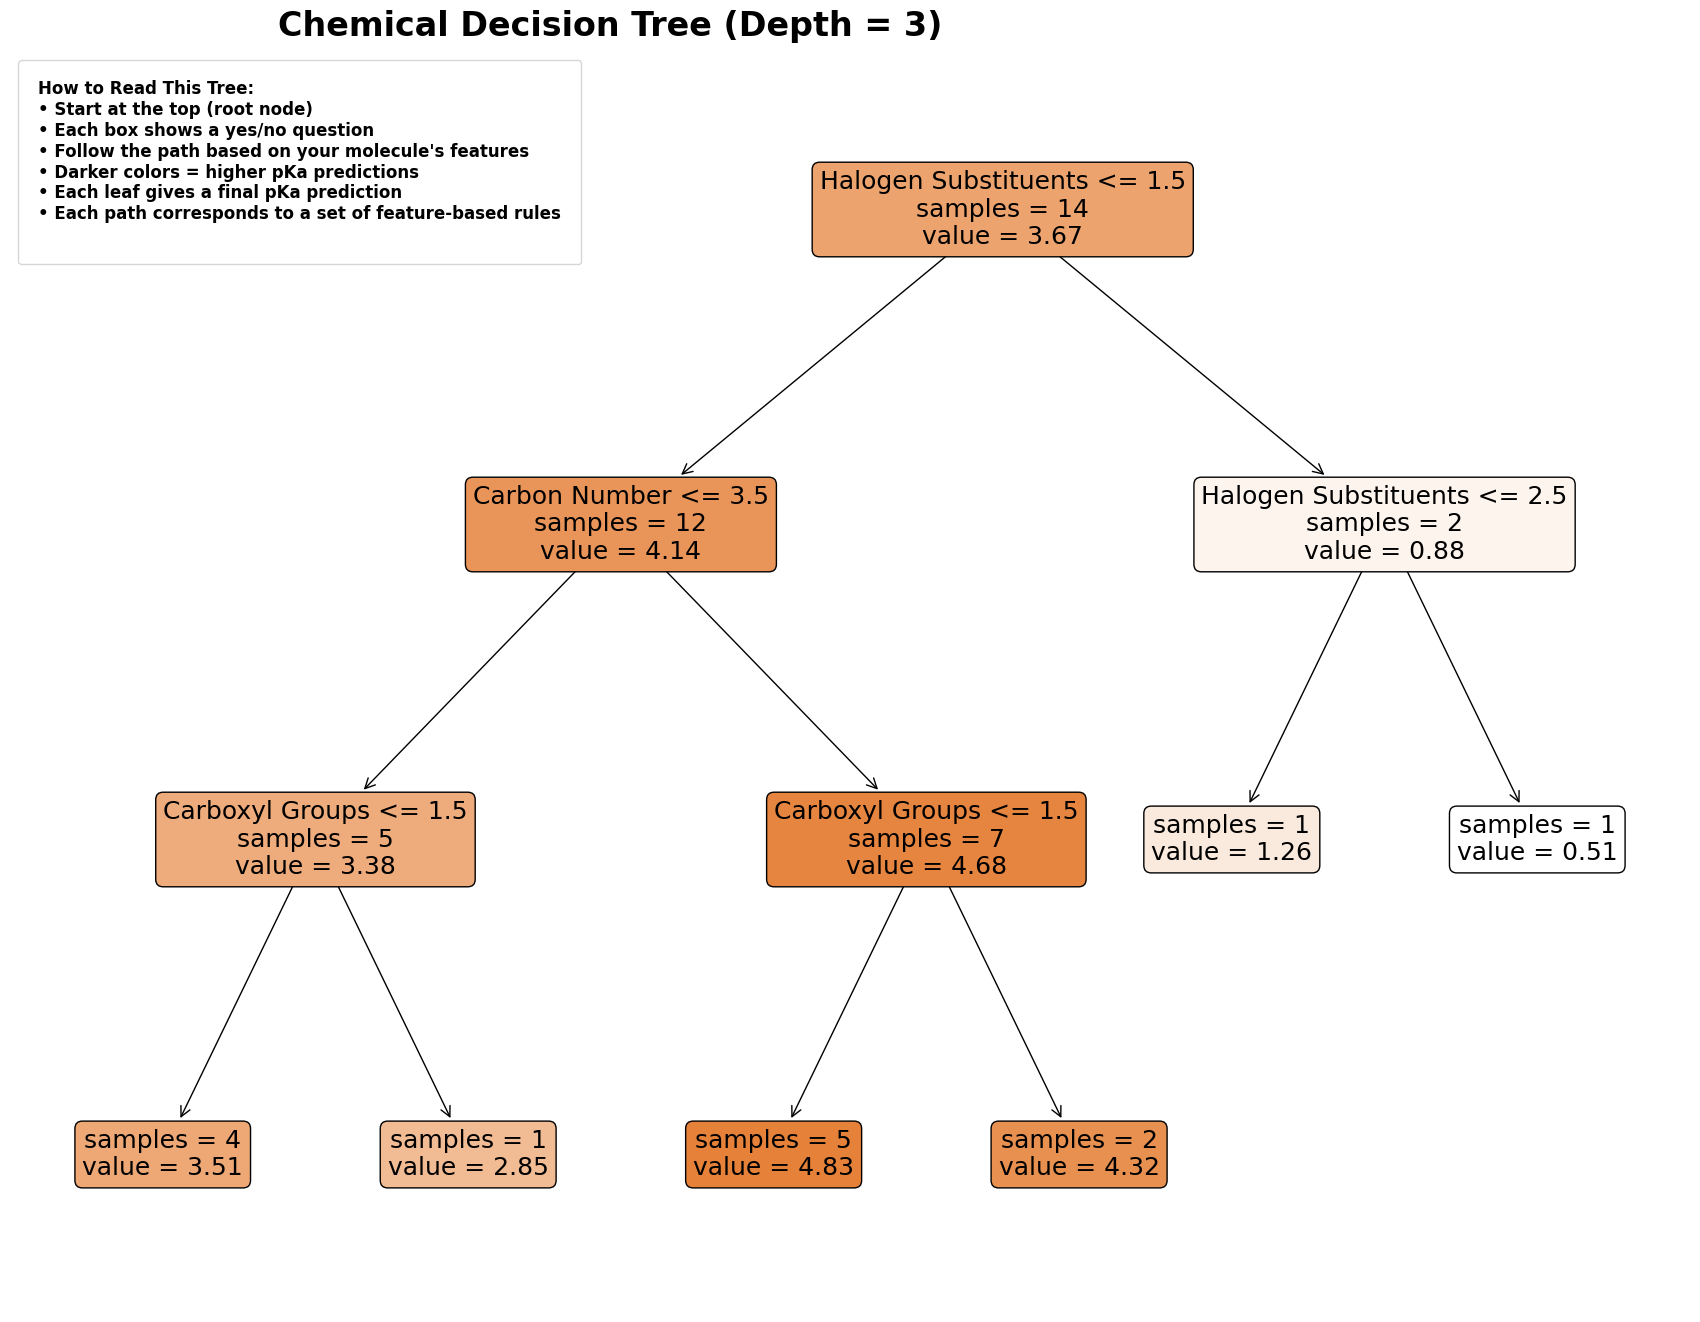


📊 Feature Importance Analysis


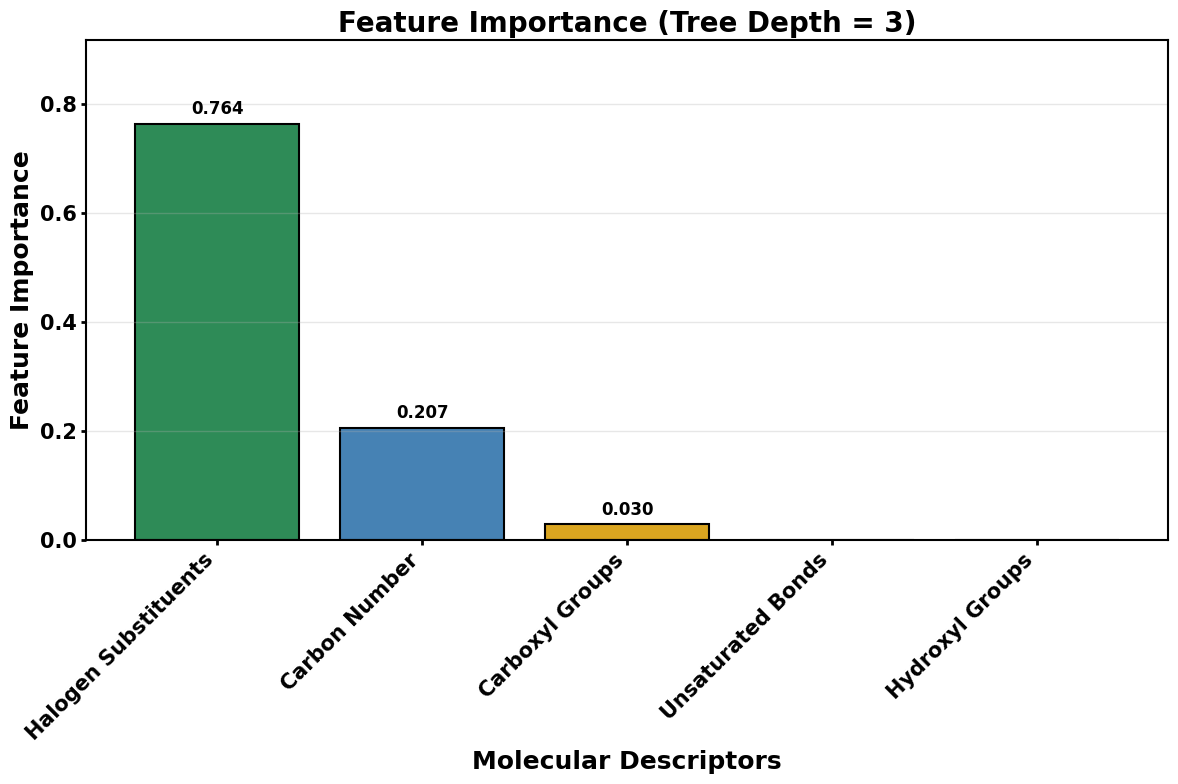

In [14]:
def visualize_decision_tree(self):
    """可视化决策树 - 与原著一致"""
    if self.model is None:
        print("❌ Please train a model first!")
        return
    
    print(f"🌳 Decision Tree Visualization (Depth = {self.selected_depth})")
    print("=" * 60)
    
    # 绘制决策树 - 与原著一致
    fig, ax = plt.subplots(figsize=(24, 14))
    plot_tree(
        self.model,
        ax=ax,
        feature_names=self.features,
        filled=True,
        impurity=False,
        rounded=True,
        fontsize=18,
        precision=2
    )
    
    # 添加说明文本 - 与原著一致
    legend_text = (
        f"How to Read This Tree:\n"
        f"• Start at the top (root node)\n"
        f"• Each box shows a yes/no question\n"
        f"• Follow the path based on your molecule's features\n"
        f"• Darker colors = higher pKa predictions\n"
        f"• Each leaf gives a final pKa prediction\n"
        f"• Each path corresponds to a set of feature-based rules\n"
    )
    
    import matplotlib.patches as mpatches
    dummy_patch = mpatches.Patch(color='white', alpha=0.0, label=legend_text)
    legend = ax.legend(
        handles=[dummy_patch],
        loc='upper left',
        fontsize=12,
        handlelength=0,
        handletextpad=0,
        frameon=True,
        fancybox=True,
        borderpad=1.2,
        prop={'family': 'Times New Roman', 'weight': 'bold'}
    )
    
    # 添加标题 - 与原著一致
    plt.suptitle(f"Chemical Decision Tree (Depth = {self.selected_depth})", 
                fontsize=24, fontweight='bold', fontfamily='Times New Roman')
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.05, left=0.25, right=0.95)
    plt.show()
    
    # 显示特征重要性 - 与原著一致
    self.show_feature_importance()

def show_feature_importance(self):
    """显示特征重要性 - 与原著一致"""
    if self.model is None:
        return
    
    print("\n📊 Feature Importance Analysis")
    print("=" * 40)
    
    importances = self.model.feature_importances_
    
    # 按重要性排序 - 与原著一致
    indices = np.argsort(importances)[::-1]
    sorted_features = [self.features[i] for i in indices]
    sorted_importances = importances[indices]
    
    # 清理特征名称 - 与原著一致
    clean_features = [f.split('(')[0].strip() for f in sorted_features]
    
    # 绘制特征重要性图 - 与原著一致
    fig, ax = plt.subplots(figsize=(12, 8))
    
    bars = ax.bar(range(len(sorted_features)), sorted_importances,
                 color=['#2E8B57', '#4682B4', '#DAA520', '#CD853F', '#8B4513', 
                       '#9932CC', '#DC143C', '#FF6347', '#32CD32'][:len(sorted_features)],
                 edgecolor='black', linewidth=1.5)
    
    # 设置标签和标题 - 轴标签增加50%字体大小并加粗
    ax.set_xlabel('Molecular Descriptors', fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_ylabel('Feature Importance', fontsize=18, fontweight='bold', fontfamily='Times New Roman')
    ax.set_title(f'Feature Importance (Tree Depth = {self.selected_depth})', 
                fontsize=20, fontweight='bold', fontfamily='Times New Roman')
    ax.set_xticks(range(len(sorted_features)))
    ax.set_xticklabels(clean_features, rotation=45, ha='right')
    
    # 设置刻度标签 - 增加50%字体大小并加粗
    ax.tick_params(axis='both', which='major', labelsize=15, width=2)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontfamily('Times New Roman')
        label.set_fontweight('bold')
    
    # 添加数值标签 - 与原著一致
    for i, (bar, importance) in enumerate(zip(bars, sorted_importances)):
        height = bar.get_height()
        if height > 0.001:
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{importance:.3f}', ha='center', va='bottom',
                   fontweight='bold', fontfamily='Times New Roman', fontsize=12)
    
    ax.grid(axis='y', alpha=0.3, linewidth=1)
    ax.set_ylim(0, max(sorted_importances) * 1.2 if max(sorted_importances) > 0 else 1)
    
    plt.tight_layout()
    plt.show()

# 将方法添加到类中
pKaPredictionTutorial.visualize_decision_tree = visualize_decision_tree
pKaPredictionTutorial.show_feature_importance = show_feature_importance
tutorial.visualize_decision_tree()

🎓 Interactive Prediction Demo
Demo molecule: Valeric acid
SMILES: CCCCC(=O)O


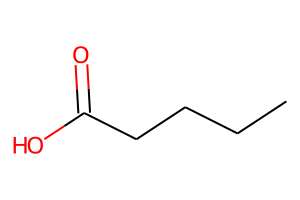


📋 Features needed for prediction:
  1. Carbon Number
  2. Hydroxyl Groups
  3. Carboxyl Groups
  4. Unsaturated Bonds
  5. Halogen Substituents

💡 To predict this molecule's pKa, use:
tutorial.predict_single_molecule(0, [feature1, feature2, ...])
where the list contains 5 numerical values for the features above.


In [15]:
def predict_testset_molecules(self):
    """预测测试集分子的pKa - 核心功能！"""
    if self.model is None:
        print("❌ Please train a model first!")
        return
    
    if self.testset is None or len(self.testset) == 0:
        print("❌ No test molecules available!")
        return
    
    print("🧪 Test Set Molecule Prediction")
    print("=" * 50)
    print("Available test molecules (with missing features):")
    
    # 显示所有测试分子
    for i, row in self.testset.iterrows():
        name = row[self.name_col]
        smiles = row[self.smiles_col]
        print(f"{i+1}. {name} ({smiles})")
    
    return self.testset

def predict_single_molecule(self, molecule_index, feature_values):
    """预测单个测试分子 - 与原著predict功能一致"""
    if self.model is None:
        print("❌ Please train a model first!")
        return None
    
    if self.testset is None or molecule_index >= len(self.testset):
        print("❌ Invalid molecule index!")
        return None
    
    if len(feature_values) != len(self.features):
        print(f"❌ Expected {len(self.features)} features, got {len(feature_values)}")
        print("Required features:")
        for i, feat in enumerate(self.features):
            print(f"  {i+1}. {feat}")
        return None
    
    # 获取分子信息
    test_mol = self.testset.iloc[molecule_index]
    name = test_mol[self.name_col]
    smiles = test_mol[self.smiles_col]
    
    print(f"\n🔬 Predicting pKa for: {name}")
    print(f"SMILES: {smiles}")
    
    # 显示分子结构
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size=(300, 200))
        display(img)
    
    # 进行预测
    prediction = self.model.predict([feature_values])[0]
    print(f"\n🎯 Predicted pKa: {prediction:.2f}")
    print(f"(Using tree depth {self.selected_depth})")
    
    return prediction

def interactive_prediction_demo(self):
    """交互式预测演示 - 为notebook环境优化"""
    if self.testset is None or len(self.testset) == 0:
        print("❌ No test molecules available!")
        return
    
    print("🎓 Interactive Prediction Demo")
    print("=" * 40)
    
    # 显示第一个测试分子作为演示
    test_mol = self.testset.iloc[0]
    name = test_mol[self.name_col]
    smiles = test_mol[self.smiles_col]
    
    print(f"Demo molecule: {name}")
    print(f"SMILES: {smiles}")
    
    # 显示分子结构
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size=(300, 200))
        display(img)
    
    # 显示需要输入的特征
    print("\n📋 Features needed for prediction:")
    for i, feat in enumerate(self.features):
        clean_feat = feat.split('(')[0].strip()
        print(f"  {i+1}. {clean_feat}")
    
    print(f"\n💡 To predict this molecule's pKa, use:")
    print(f"tutorial.predict_single_molecule(0, [feature1, feature2, ...])")
    print(f"where the list contains {len(self.features)} numerical values for the features above.")

def run_complete_tutorial():
    """运行完整教程 - 忠于原著"""
    print("🎓 pKa Prediction with Decision Trees - Interactive Tutorial")
    print("=" * 70)
    
    # 创建教程实例
    tutorial = pKaPredictionTutorial()
    
    # 显示知识介绍
    print("\n📚 Step 1: Knowledge Introduction")
    tutorial.display_knowledge_steps()
    
    return tutorial

# 将方法添加到类中
pKaPredictionTutorial.predict_testset_molecules = predict_testset_molecules
pKaPredictionTutorial.predict_single_molecule = predict_single_molecule
pKaPredictionTutorial.interactive_prediction_demo = interactive_prediction_demo


tutorial.interactive_prediction_demo()
# tutorial.predict_single_molecule(0, [feature_val1, feature_val2, ...])
